# Project: Gabminder Data Analysis (How People Live Their Lives)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For my analysis I chose the Gabminder World Dataset, which has information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. For this project I chose three indicators which are 'Life expectancy in years', 'Total Population of countries' and 'Income per capita' (which is inflation adjusted).

At the end of this analysis I'll answer the questions:

1. "Does higher income mean higher life expectancy?"

2. "Did the corona virus crisis affect the life expectancy of countries around the world?"

#### First we import the libraries we will be using

In [1]:
# Importing the libraries we will be using throughout our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Importing the csv files of the data that we will analyize

income_df = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
pop_df = pd.read_csv('population_total.csv')
life_df = pd.read_csv('life_expectancy_years.csv')

### Exploring the dataframes

### I used the following methods to further understand the dataframes:
#### Note that I used the methods on all dataframes but in the report I'm only showing an example of how they work

.Shape: to know the number of columns and rows of dataframes

.info(): to further understand the dataframes and know the types of values

.duplicated(): to check if there are any duplicated rows in the dataframe, and used sum() to know the total of these rows

.isnull(): to check if there are any NULL data in the rows and to understand either to delete these rows or replace them

In [3]:
# using a function to find the number of columns and rows of a Dataframe

def shape(df):
    shape = df.shape   
    return shape

In [4]:
# using a function to further understand the Dataframe and know the types of values inside said DataFrame

def info(df):
    info = df.info
    return shape

In [5]:
# using a function to find the total number of duplicated rows in the DataFrame

def sum_dub(df):
    sum_dub = sum(df.duplicated())
    return sum_dub

In [6]:
#using a function to check if there are any NULL values in the DataFrame and their total number

def sum_null(df):
    sum_null = df.isnull().sum().sum()
    return sum_null

### Data Cleaning

after further exploring the dataframes I decided to explore the data between 2000 and 2020 because of the huge number of missing data prior to selected years and also after the year 2000 the collection of data was more accurate and it will give a better understanding of the current world we live in.

In [7]:
# Using a function to remove all the columns prior to year 2000, we set the inplace parameter to True to modify the original Dataframe

def scaling_1(df):
    scaling1 = df.drop(df.iloc[:, 1:201], axis = 1, inplace = True)
    
    return scaling_1

In [8]:
# Using a function to remove all the columns after the year 2022, we set the inplace parameter to True to modify the original Dataframe

def scaling_2(df):
    scaling2 = df.drop(df.iloc[:, 24:], axis = 1, inplace = True)
    
    return scaling_2

In [9]:
# calling both function (scaling_1 & scaling_2) to clean the dataframe and to make our analysis regarding the 21th century 

scaling_1(life_df)
scaling_1(pop_df)
scaling_1(income_df)
scaling_2(life_df)
scaling_2(pop_df)
scaling_2(income_df)

<function __main__.scaling_2(df)>

In [10]:
# Using a funtion to check that our scaling was successful for all the DataFrames

def head(df):
    head = df.head(1)
    return head

### Tidying the dataframes to be valid for analysis

In order to do so we are going to use the .melt method on each dataframe and then we merge all the dataframes in one dataframe.

We are going to call the new dataframe main_df which will contain the following columns
1. country
2. year
3. country_population
4. income_per_capita
5. life_expectancy

In [11]:
# Using a .melt method to properly organize our data to be suitable of analysis

def melting(df):
    column_name = input('Please enter the name you want to give to the column of this data regarding the dataframe ')
    df = pd.melt(df, id_vars = ['country'], var_name = 'year', value_vars = df.columns[1:], value_name = column_name)
    return df

In [12]:
pop_df = melting(pop_df) #asking the user to input the name of the column showing the data of the country population we suggest inputting country_population

Please enter the name you want to give to the column of this data regarding the dataframe country_population


In [13]:
income_df = melting(income_df) #asking the user to input the name of the column showing the data of the income we suggest inputting income

Please enter the name you want to give to the column of this data regarding the dataframe income


In [14]:
life_df = melting(life_df) #asking the user to input the name of the column showing the data of the life expectancy we suggest inputting life_expectancy

Please enter the name you want to give to the column of this data regarding the dataframe life_expectancy


In [15]:
# Now we merge the results to make one dataframe to start our analysis

def merging(df1, df2):
    main_df = pd.merge(df1, df2, on = ['country', 'year'])
    return main_df

In [16]:
main_df = merging(pop_df, income_df)

In [17]:
main_df = merging(main_df, life_df)

In [18]:
main_df.head()

,country,year,country_population,income,life_expectancy
0,Afghanistan,2000,20.8M,584,54.7
1,Angola,2000,16.4M,2340,52.8
2,Albania,2000,3.13M,5890,75.4
3,Andorra,2000,65.4k,35.8k,80.8
4,United Arab Emirates,2000,3.13M,71.6k,69.1


In [19]:
# Using the .info() method to check if we need to make another fixings to the dataframe

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4485 entries, 0 to 4484
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             4485 non-null   object 
 1   year                4485 non-null   object 
 2   country_population  4485 non-null   object 
 3   income              4485 non-null   object 
 4   life_expectancy     4458 non-null   float64
dtypes: float64(1), object(4)
memory usage: 210.2+ KB


It seems we need to fix the Dtype issue, we can see that the country population and income are object (strings)
We need to fix this by converting the Dtype to floats.

Also we have (9) NULL values in the life_expectancy column so we need to remove these NULL values.

### Changing symbols to values

After exploring the dataframe we saw that there are few numbers in the population and income columns which has the symbols (k, K, M, B) which represents (1000, 1000, 1000,000 , and 1000,000,000) repectivly and we need to change these symbols to value in order to change the Dtype from object to float

EX. 35.8k to be 35800, 
    65.4k to be 65400, 
    and 3.13M to be 3130000

In [20]:
columns = ['country_population', 'income']
for c in columns:
    main_df[c] = main_df[c].replace(r'[kKMB]+$', '', regex = True).astype(float) * main_df[c].str.extract(r'[\d\.]+([KkMB]+)', expand = False).fillna(1).replace(['K','k', 'M', 'B'], [10**3, 10**3, 10**6, 10**9]).astype(int)

### Dropping the NULL values rows

In [21]:
# Using the .dropna() method to remove the NULL values and we set the inplace parameter to True to modify the original dataframe

main_df.dropna(inplace = True)

In [22]:
# Using the .info() method again to make sure our fixing was successful

main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4458 entries, 0 to 4484
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             4458 non-null   object 
 1   year                4458 non-null   object 
 2   country_population  4458 non-null   float64
 3   income              4458 non-null   float64
 4   life_expectancy     4458 non-null   float64
dtypes: float64(3), object(2)
memory usage: 209.0+ KB


Now that we have a clear and tidy dataframe and fixed all the issues we saw we can now start our analysis

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Does higher income mean higher life expectancy?)

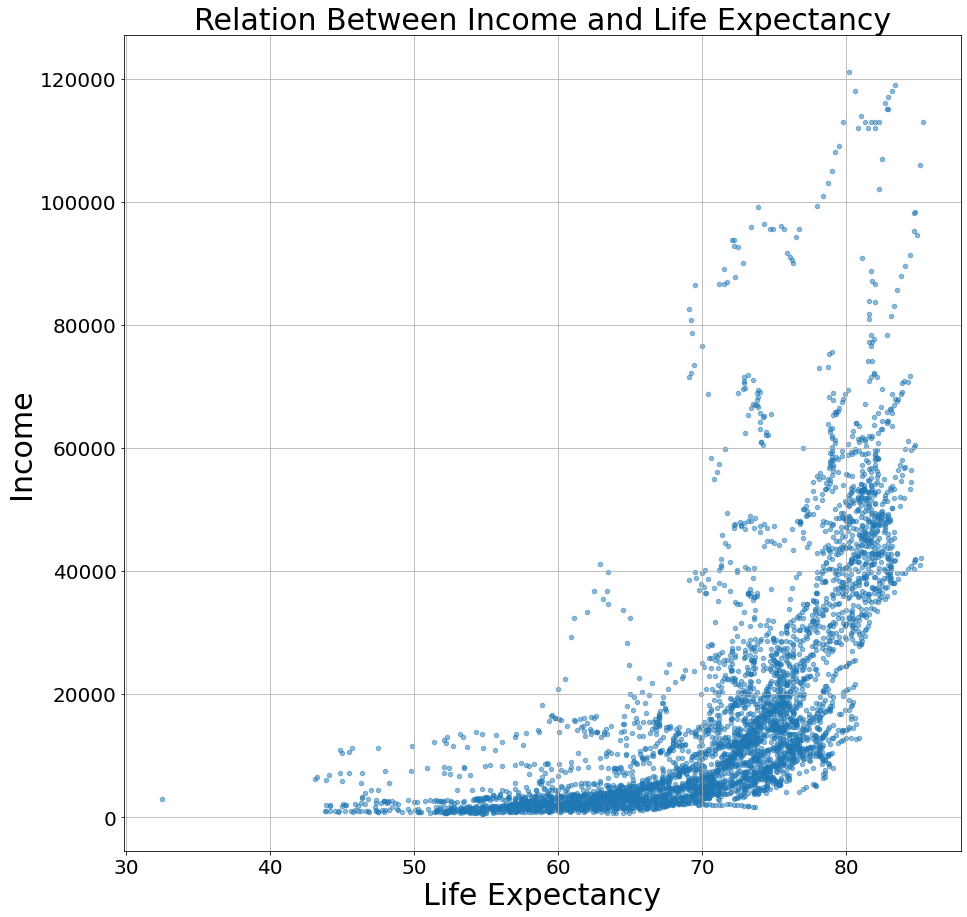

In [23]:
main_df.plot(kind = 'scatter', x = 'life_expectancy', y = 'income', alpha=.5, figsize = (15, 15), fontsize = 20, grid = True)
plt.title('Relation Between Income and Life Expectancy', fontsize = 30)
plt.xlabel('Life Expectancy', fontsize = 30 )
plt.ylabel('Income', fontsize = 30);

##### As shown in the figure there's somehow a direct correlation between the Income and Life Expectancy, as the Income increase the Life Expectancy increase

### Research Question 2  (Did The Corona Virus Crisis Affect The Average Life Expectancy Of The World?)

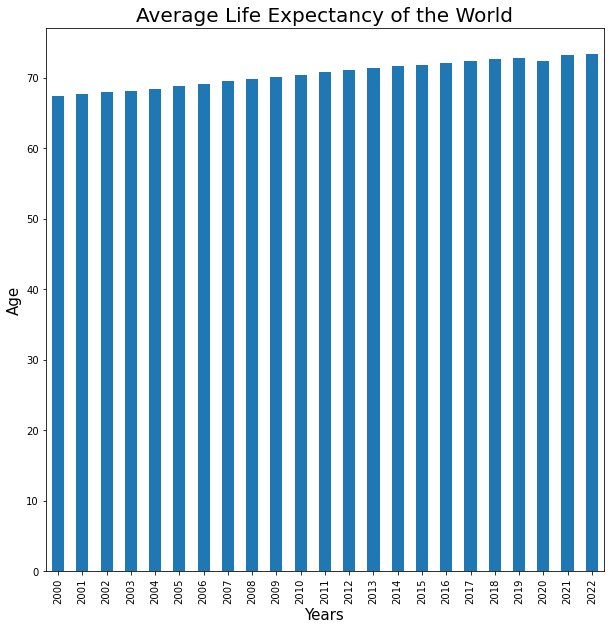

In [24]:
main_df.groupby('year')['life_expectancy'].mean().plot(kind = 'bar', figsize = (10, 10));
plt.title('Average Life Expectancy of the World', fontsize = 20)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Age', fontsize = 15);

##### As shown in the previous graph there was a slight drop in the average life expectancy in 2020

<a id='conclusions'></a>
## Conclusions

From the previous two graphs we were able to answer our questions.

##### Limitation of the research

This study has potential limitation. For the first question we studied the relation between Income per capita and Life Expectancy, a better relation would've been between Total spending by government on health department and Life Expectancy.
However, the Gabminder data didn't collect total spending on health department after 2010 which mean it wouldn't be suitable for our study, we encourage to contact the gabminder site and ask them if they have any data after 2010 which would've been more helpful in our study

##### Conclusion from the first question:

From the first graph we could see there's a direct correlation between income and life expectancy though it wasn't right away, we can see that up until 70 years old there's no major change in income but after 70 years old we can see the drastic change in income.

##### Conclusion from the second question:

From the second graph we could see there was a slight drop in life expectancy in 2020 and that's when the coronavirus pandemic hit the hardest before the world had a vaccine distributed, we can see there was a drop from 72.9 in 2019 to 72.4in 2020, and though it is not a huge drop in life expectancy, I noticed that in 2021 the life expectancy rose again to 73.3 in 2021 which is higher than 2019 and again to 73.5 in 2022. So we can see that with the advancement  of health care life expectancy began to recover after 2020, we can conclude that the coronavirus pandemic did have an effect on the life expectancy of the world.